In [1]:
from graph_generating_script import *
from graph_metric_script import *
import matplotlib.pyplot as plt
import igraph as ig
np.random.seed(212)

In [ ]:
def draw_five_layouts(G, graph_id):
    np.random.seed(212)
    G_ig = ig.Graph.TupleList(nx.to_edgelist(G), directed=False)
    missing_vertices = set(G.nodes()) - set(G_ig.vs['name'])
    G_ig.add_vertices(list(missing_vertices))
    layouts = [
        nx.circular_layout(G),
        nx.random_layout(G),
        nx.kamada_kawai_layout(G),
        G_ig.layout('davidson_harel'),
        G_ig.layout('graphopt'),
    ]
    layout_names = ['circular_layout', 'random_layout', 'kamada_kawai_layout', 'davidson_harel',  'graphopt']
    # Create a 2x5 subplot
    fig, axes = plt.subplots(1, 5, figsize=(20, 4))

    # Draw the graph using each layout
    for ax, pos, layout_name in zip(axes.flatten(), layouts, layout_names):
        # pos = layout(G)
        nx.draw(G, pos, with_labels=True, edge_color='gray', node_size=300, font_size=10, ax=ax)
        ax.set_title(layout_name)

    plt.savefig(f'layouts_img/{graph_id}_all_layouts_img.png')

    plt.show()


In [ ]:
def save_layouts_to_file(G, layouts, graph_id):
    # graph_id = '0'
    layouts_dict = {
        'circular_layout': pd.DataFrame.from_dict(layouts[0], orient='index', columns=['X', 'Y']),
        'random_layout': pd.DataFrame.from_dict(layouts[1], orient='index', columns=['X', 'Y']),
        'kamada_kawai_layout': pd.DataFrame.from_dict(layouts[2], orient='index', columns=['X', 'Y']),
        'davidson_harel': pd.DataFrame(layouts[3].coords, columns=['X', 'Y']),
        'graphopt': pd.DataFrame(layouts[4].coords, columns=['X', 'Y'])
    }

    # Save each layout position to a separate file
    for layout_name, pos in layouts_dict.items():
        pos.to_csv(f'pos_dfs/{graph_id}_{layout_name}.csv', index=False)
        # with open(f'pos_dfs/{graph_id}_{layout_name}.pkl', 'wb') as f:
            # pickle.dump(pos, f)

In [5]:
np.random.seed(212)
G = nx.erdos_renyi_graph(8, .3)

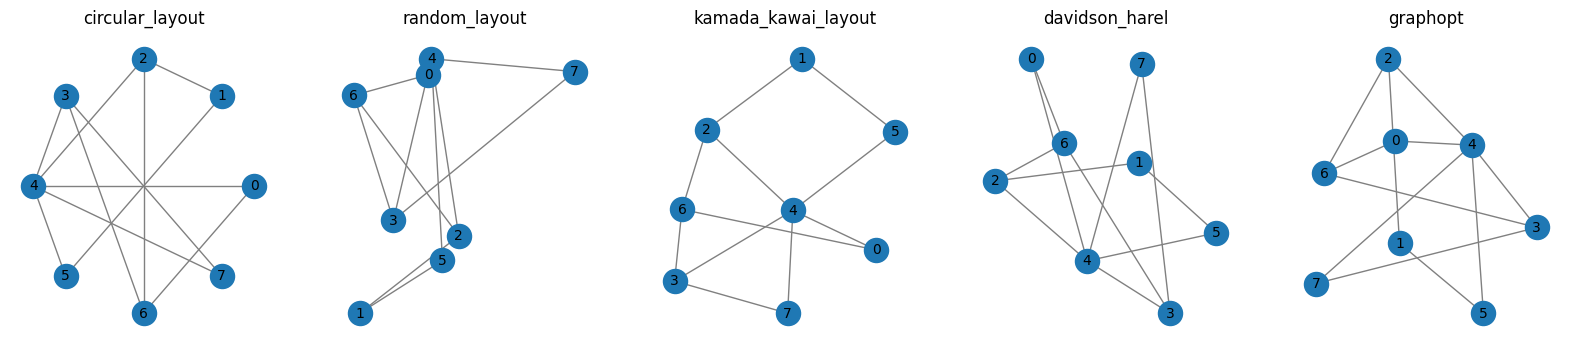

In [15]:
np.random.seed(212)
G_ig = ig.Graph.TupleList(nx.to_edgelist(G), directed=False)
missing_vertices = set(G.nodes()) - set(G_ig.vs['name'])
G_ig.add_vertices(list(missing_vertices))
layouts = [
    nx.circular_layout(G),
    nx.random_layout(G),
    nx.kamada_kawai_layout(G),
    G_ig.layout('davidson_harel'),
    G_ig.layout('graphopt'),
]


layout_names = ['circular_layout', 'random_layout', 'kamada_kawai_layout', 'davidson_harel',  'graphopt']
# Create a 2x5 subplot
fig, axes = plt.subplots(1, 5, figsize=(20, 4))

# Draw the graph using each layout
for ax, pos, layout_name in zip(axes.flatten(), layouts, layout_names):
    # pos = layout(G)
    nx.draw(G, pos, with_labels=True, edge_color='gray', node_size=300, font_size=10, ax=ax)
    ax.set_title(layout_name)

plt.savefig('0_all_layouts_img.png')
plt.show()
#kamada, graphopt, circular, davidson, random


In [9]:
#saving to file
import pickle 
with open('graph_objects/graph_0.pkl', 'wb') as f:
    pickle.dump(G, f)

In [11]:
graph_id = '0'
layouts_dict = {
    'circular_layout': pd.DataFrame.from_dict(layouts[0], orient='index', columns=['X', 'Y']),
    'random_layout': pd.DataFrame.from_dict(layouts[1], orient='index', columns=['X', 'Y']),
    'kamada_kawai_layout': pd.DataFrame.from_dict(layouts[2], orient='index', columns=['X', 'Y']),
    'davidson_harel': pd.DataFrame(layouts[3].coords, columns=['X', 'Y']),
    'graphopt': pd.DataFrame(layouts[4].coords, columns=['X', 'Y'])
}

# Save each layout position to a separate file
for layout_name, pos in layouts_dict.items():
    pos.to_csv(f'pos_dfs/{graph_id}_{layout_name}.csv', index=False)
    # with open(f'pos_dfs/{graph_id}_{layout_name}.pkl', 'wb') as f:
        # pickle.dump(pos, f)